## Customer Segmentation Analysis 

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from IPython.display import display, Markdown
from sklearn.preprocessing import StandardScaler

In [53]:
# Set display options for better readability
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [54]:
data = pd.read_csv("Customer_Segmentation_Dataset.csv")
# Display the first few rows of the dataset
display(Markdown("**First few rows of the dataset:**"))
data.head()

**First few rows of the dataset:**

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [55]:
display(Markdown("**INFO About Dataset**"))
data.info()

**INFO About Dataset**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [56]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [57]:
# Check for missing values
print(data.isnull().sum())


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [58]:
# Handle missing values (example: fill with mean or drop)
# Example of filling missing values with mean
data.fillna(data.mean(), inplace=True)  

In [59]:
# Remove white spaces from all string columns
data = data.apply(lambda x: x.strip() if isinstance(x, str) else x)

In [60]:
print('Percentage of data remaining = {}%'.format(
    (len(data.dropna().index)*100)/len(data.index)))
data = data.dropna()

Percentage of data remaining = 100.0%


In [61]:
# Calculate average spending on various products
average_spending = {
    'Average Wine Spending': data['MntWines'].mean(),
    'Average Fruits Spending': data['MntFruits'].mean(),
    'Average Meat Products Spending': data['MntMeatProducts'].mean(),
    'Average Fish Products Spending': data['MntFishProducts'].mean(),
    'Average Sweet Products Spending': data['MntSweetProducts'].mean(),
    'Average Gold Products Spending': data['MntGoldProds'].mean(),
    'Average Purchase Value': data[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().mean(),
    'Purchase Frequency': data[['NumDealsPurchases', 'NumWebPurchases', 
                                 'NumCatalogPurchases', 'NumStorePurchases']].sum().sum()  # Ensure it's a single value
}

# Print average spending with formatting
for key, value in average_spending.items():
    print(f'{key}: {value:.2f}')  # Display values rounded to 2 decimal places


Average Wine Spending: 306.16
Average Fruits Spending: 26.40
Average Meat Products Spending: 165.31
Average Fish Products Spending: 37.76
Average Sweet Products Spending: 27.13
Average Gold Products Spending: 44.06
Average Purchase Value: 101.14
Purchase Frequency: 32828.00


In [62]:
# Select features for clustering
features = data[['Income', 'MntTotal', 'Recency', 'NumWebPurchases', 'NumStorePurchases']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit K-means
kmeans = KMeans(n_clusters=4, random_state=42)  # You can change the number of clusters
data['Cluster'] = kmeans.fit_predict(scaled_features)

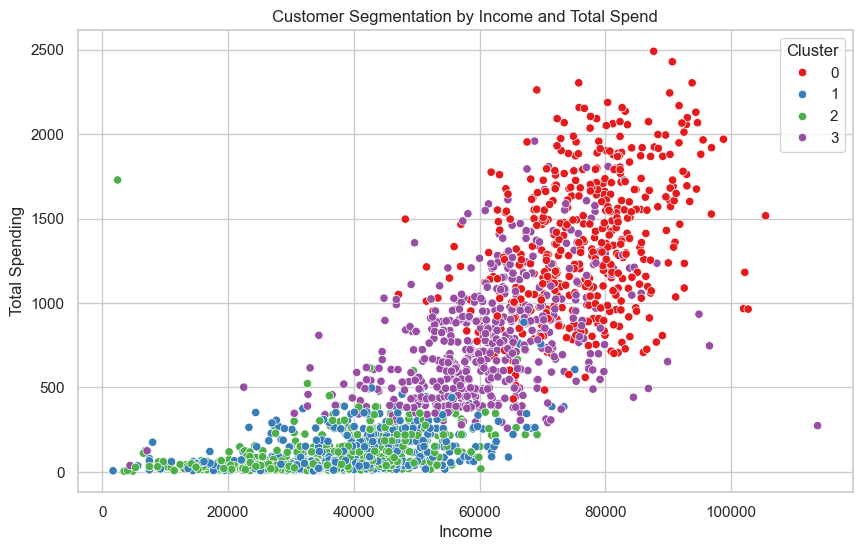

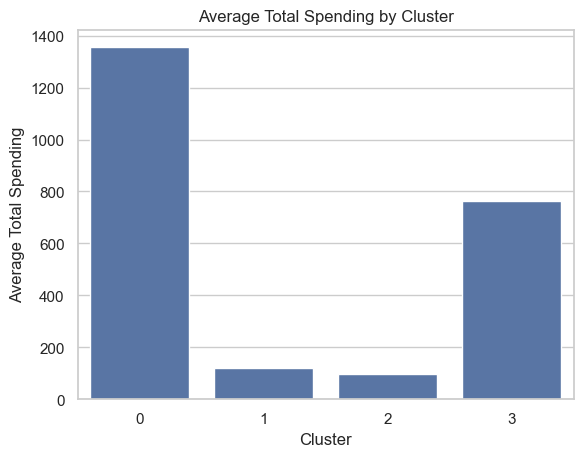

In [63]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntTotal', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segmentation by Income and Total Spend')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.legend(title='Cluster')
plt.show()

# Bar chart for average spending by cluster
avg_spending = data.groupby('Cluster')['MntTotal'].mean().reset_index()
sns.barplot(x='Cluster', y='MntTotal', data=avg_spending)
plt.title('Average Total Spending by Cluster')
plt.ylabel('Average Total Spending')
plt.xlabel('Cluster')
plt.show()

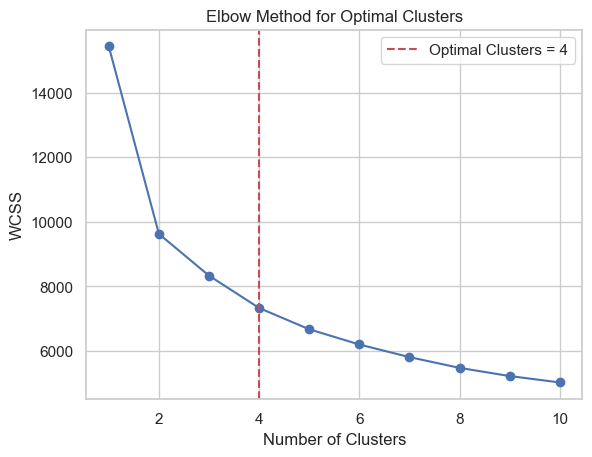

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Cluster,cluster
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,3,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,3,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,2,2
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0,3,1
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1,3,0
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1,0,3
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0,3,3


In [64]:
# Select features for clustering
features = data[['Recency', 'MntWines', 'MntFruits', 
                 'MntMeatProducts', 'MntFishProducts', 
                 'MntSweetProducts', 'MntGoldProds']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, min(11, len(data) + 1)):
    kmeans = KMeans(n_clusters=i, n_init=10)
    wcss.append(kmeans.fit(scaled_features).inertia_)

# Plot the Elbow method
plt.plot(range(1, len(wcss) + 1), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=4, color='r', linestyle='--', label='Optimal Clusters = 4')
plt.legend()
plt.show()

# Fit K-means with the optimal number of clusters
optimal_clusters = min(4, len(data))  # Make sure it's less than or equal to the number of samples
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Display the DataFrame with cluster assignments
data

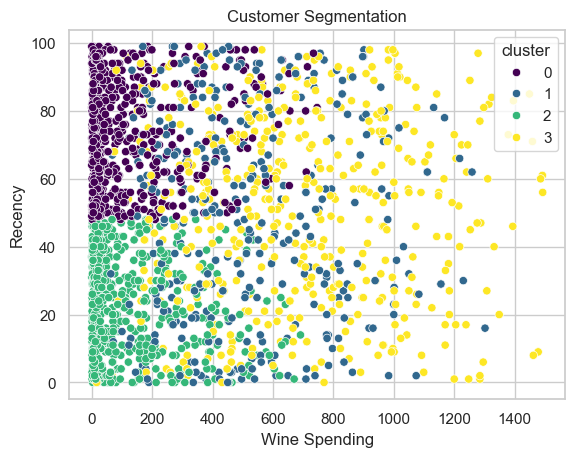

In [65]:
# Visualizing clusters using scatter plot (using two features for simplicity)
sns.scatterplot(x='MntWines', y='Recency', hue='cluster', data=data, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Wine Spending')
plt.ylabel('Recency')
plt.show()

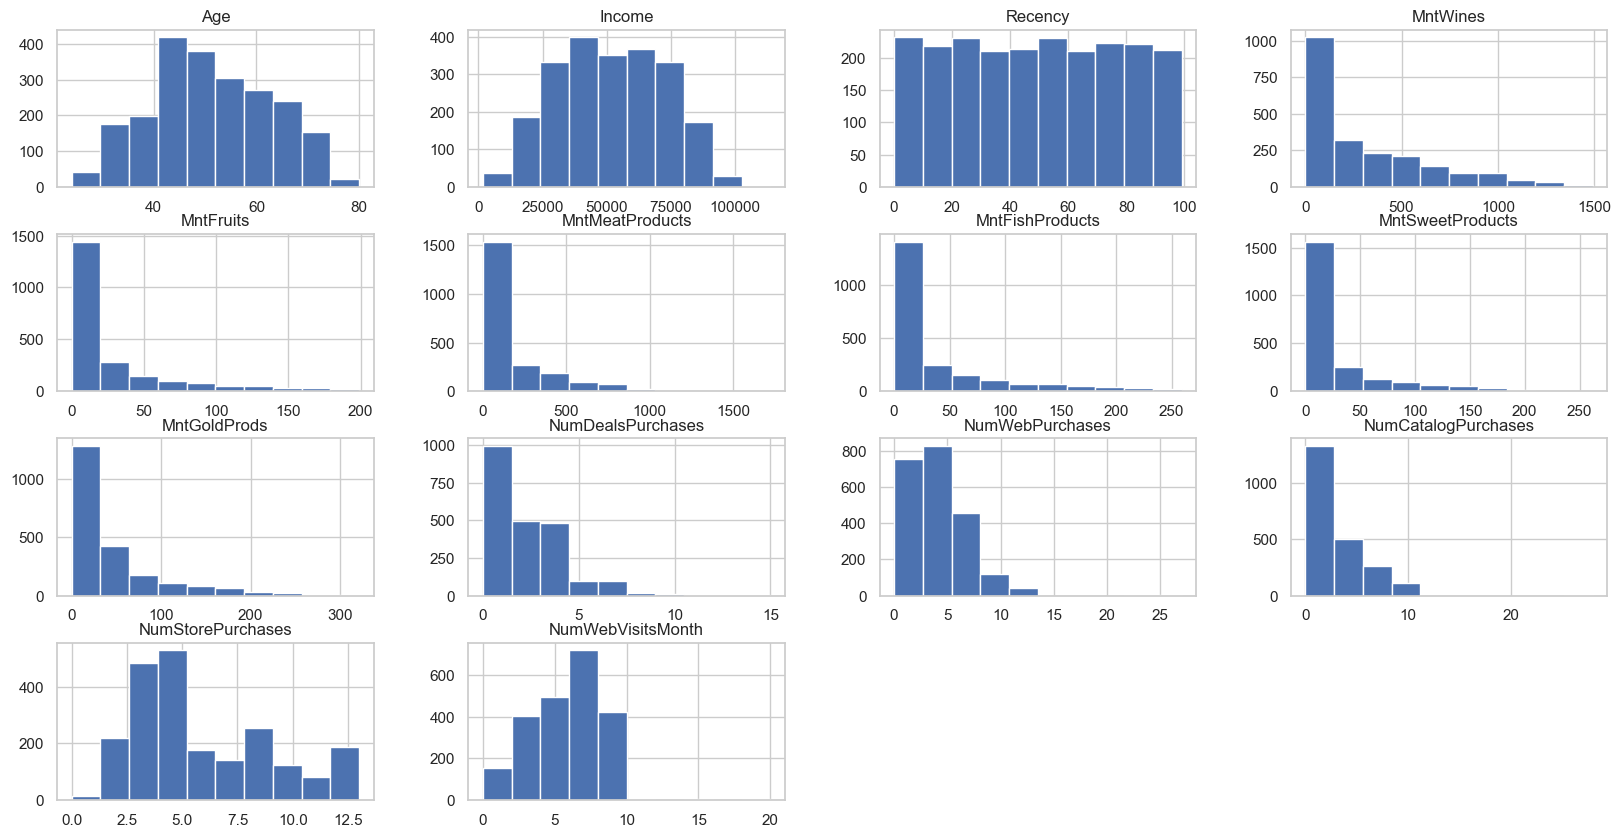

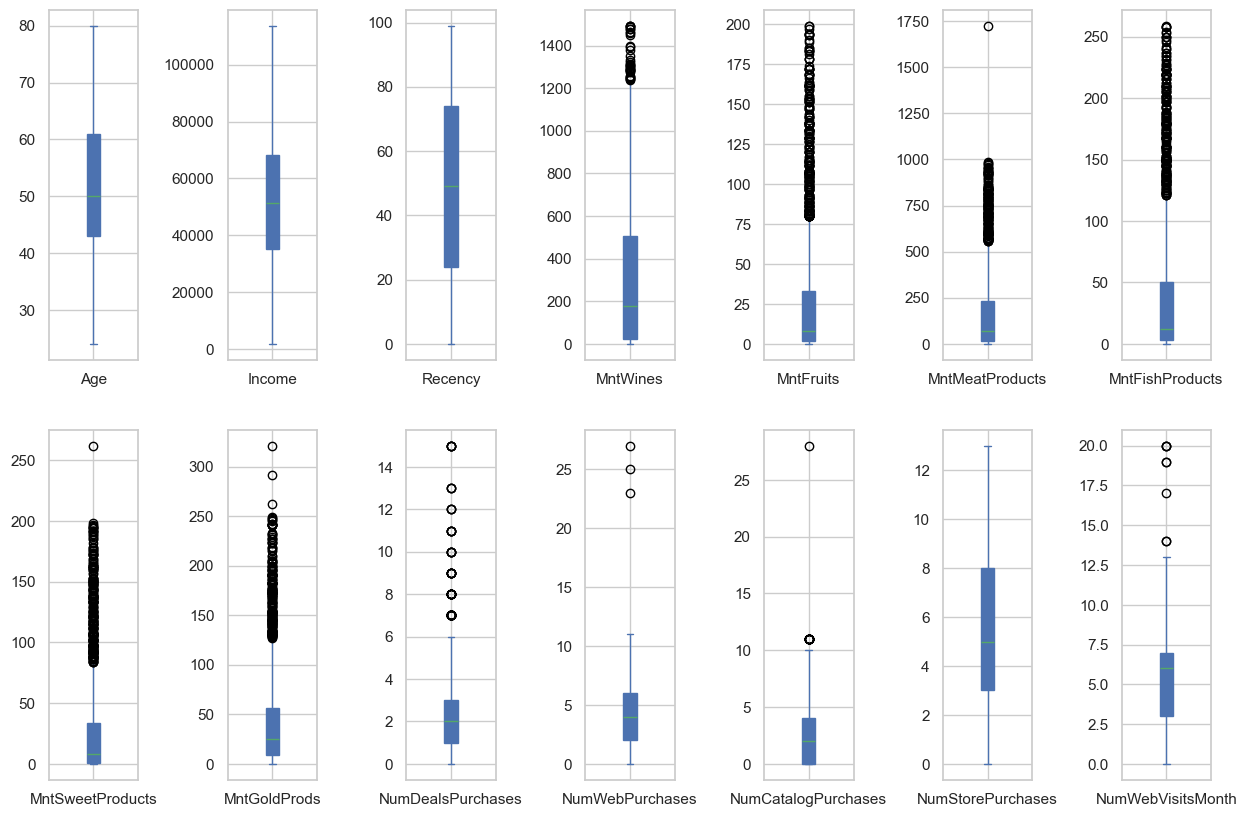

In [66]:
continous_columns = ['Age', 'Income', 'Recency', 'MntWines', 'MntFruits',
                     'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                     'MntGoldProds', 'NumDealsPurchases','NumWebPurchases',
                     'NumCatalogPurchases', 'NumStorePurchases',
                     'NumWebVisitsMonth']
data[continous_columns].hist(figsize=(20,10))
data[continous_columns].plot(subplots=True, layout=(2,7), kind='box', patch_artist=True, figsize=(15,10))
plt.subplots_adjust(wspace=1)

In [67]:
# Calculate the columns you want
data['Age'] = data['Age']
data['Younghome'] = + data['Kidhome'] + data['Teenhome']
data['TotalAccepted'] = (data['AcceptedCmp3'] + 
                         data['AcceptedCmp4'] +
                         data['AcceptedCmp5'])
data['TotalChannelPurchases'] = (data['NumWebPurchases'] + 
                                   data['NumCatalogPurchases'] + 
                                   data['NumStorePurchases'])
data['TotalProductSales'] = (data['MntWines'] + data['MntMeatProducts']+ data['MntFishProducts']+
                 data['MntSweetProducts'] + data['MntGoldProds']+
                              data['MntFruits'])  # Adjust as needed

# Create data_clean with only the desired columns
data_clean = data[['Age', 'Younghome', 'TotalAccepted', 'TotalChannelPurchases', 'TotalProductSales']]

# Display the cleaned DataFrame
display(Markdown("**Cleaned Dataset and merge into 5 columns:**"))
data_clean

**Cleaned Dataset and merge into 5 columns:**

,Age,Younghome,TotalAccepted,TotalChannelPurchases,TotalProductSales
0,63,0,0,22,1617
1,66,2,0,4,27
2,55,0,0,20,776
3,36,1,0,6,53
4,39,1,0,14,422
...,...,...,...,...,...
2200,53,1,0,16,1341
2201,74,3,0,15,444
2202,39,0,1,18,1241
2203,64,1,0,21,843


In [68]:
# Analyze characteristics of each segment
segment_summary = data.groupby('Cluster').mean()
print(segment_summary)

# Provide insights
for i in range(len(segment_summary)):
    print(f"Segment {i}:")
    print(segment_summary.iloc[i])
    print("\nRecommendations based on the segment characteristics...")


               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        76582.361829  0.051690  0.212724  49.976143  683.844930  61.007952   
1        37268.234862  0.730275  0.528440  75.966972   65.058716   6.979817   
2        34401.201022  0.739353  0.463373  25.097104   49.735945   5.836457   
3        61054.557895  0.205263  0.789474  47.005263  467.485965  35.617544   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             457.041750        89.679920         63.775348     74.343936   
1              32.955963         9.708257          7.346789     21.273394   
2              27.293015         8.741056          5.032368     18.490630   
3             176.559649        48.635088         36.457895     65.443860   

         NumDealsPurchases  NumWebPurchases  NumCatalogPurchas

## ---
# Customer Segmentation Analysis Completed
## ---